In [28]:
%matplotlib inline

width = 6
height = 3
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, height]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

In [29]:
print(pd.__version__)
print(np.__version__)
print(hmmlearn.__version__)

1.4.2
1.22.4
0.3.0


## Look at the data

In [30]:
nile = pd.read_csv("Nile.csv", index_col = 0)

In [31]:
nile.head()

,year,val
1,1871,1120
2,1872,1160
3,1873,963
4,1874,1210
5,1875,1160


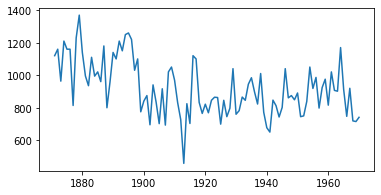

In [42]:
plt.plot(nile.year, nile.val)

## Let's take a look at the hmmlearn API

In [65]:
vals = np.expand_dims(nile.val.values, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [66]:
np.bincount(hidden_states)

array([72, 28])

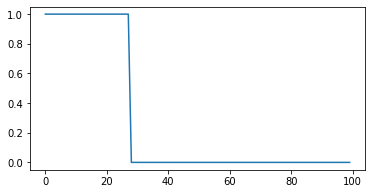

In [67]:
plt.plot(hidden_states)

## Exercise: how can we package this more conveniently?

In [68]:
def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
#     # re-order parameters in ascending order of mean of underlying distribution
#     idx      = np.argsort(mus)
#     mus      = mus[idx]
#     sigmas   = sigmas[idx]
#     transmat = transmat[idx, :][:, idx]
    
#     state_dict = {}
#     states = [i for i in range(n_states)]
#     for i in idx:
#         state_dict[i] = states[idx[i]]
    
#     relabeled_states = [state_dict[h] for h in hidden_states]
    relabeled_states = hidden_states
    return (relabeled_states, mus, sigmas, transmat, model)

In [69]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 2)

[ 850.756 1097.153]
[124.446 133.748]


## Exercise: how might we be able to plot this more sensibly?

In [72]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow',         color=color)
    ax1.plot(time_vals, ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

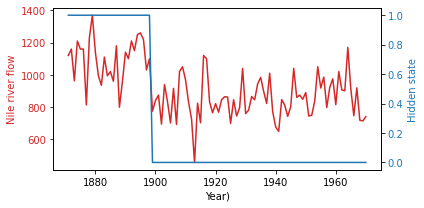

In [73]:
plot_states(nile.val, hidden_states, nile.year)

## Exercise: can we improve on the analysis above?

### Cut off the 'special' region

In [74]:
np.where(hidden_states == 0)

(array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
        45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
        62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
        79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]),)

In [75]:
hidden_states, mus, sigmas, transmat, model = fitHMM(nile.val.values, 3)


[ 845.723 1097.238  866.432]
[105.539 133.854 166.802]


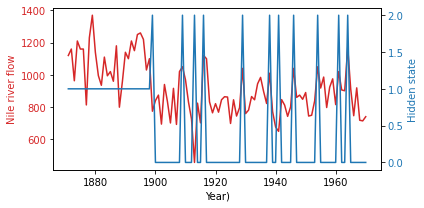

In [76]:
plot_states(nile.val, hidden_states, nile.year)

In [77]:
mus

array([ 845.723, 1097.238,  866.432])

In [78]:
np.set_printoptions(precision = 3, suppress = True)

In [79]:
transmat

array([[0.672, 0.   , 0.328],
       [0.006, 0.964, 0.03 ],
       [0.964, 0.   , 0.036]])

In [80]:
mus

array([ 845.723, 1097.238,  866.432])

## Exercise: generate new synthetic data from the model and then fit it with a fresh HMM model

#### Easy to sample from an existing HMM model

In [105]:
sampled = model.sample(1000)

In [106]:
res = np.squeeze(sampled[0])
real_states = np.squeeze(sampled[1])

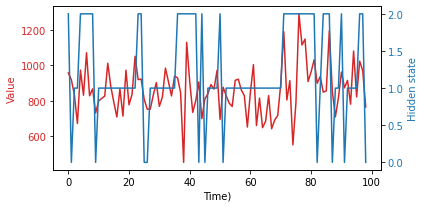

In [107]:
plot_states_no_time(res[1:100], real_states[1:100])

#### Then refit

In [108]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)

[795.741 881.138 863.246]
[109.448  85.392 172.884]


In [109]:
def plot_states_no_time(ts_vals, states):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time)')
    ax1.set_ylabel('Value',        color=color)
    ax1.plot(ts_vals,              color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(states,        color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

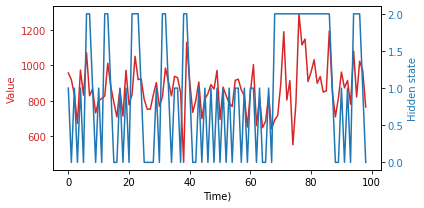

In [110]:
plot_states_no_time(res[1:100], hidden_states[1:100])

In [111]:
transmat

array([[0.328, 0.35 , 0.322],
       [0.656, 0.274, 0.07 ],
       [0.   , 0.397, 0.602]])